Carregar dados

In [1]:
import import_ipynb
import pandas as pd
import numpy as np

from sklearn.metrics import *

import k2_base
import kepler_base
import tess_base
import general_base

importing Jupyter notebook from k2_base.ipynb
['not planet' 'planet'] [ 311 2092] [0.12942156 0.87057844]
['not planet' 'planet'] [ 245 1677] [0.12747138 0.87252862]
['not planet' 'planet'] [ 66 415] [0.13721414 0.86278586]
importing Jupyter notebook from kepler_base.ipynb
['not planet' 'planet'] [4839 2741] [0.6383905 0.3616095]
['not planet' 'planet'] [3890 2174] [0.64149077 0.35850923]
['not planet' 'planet'] [949 567] [0.62598945 0.37401055]
importing Jupyter notebook from tess_base.ipynb
['not planet' 'planet'] [1089 5106] [0.17578692 0.82421308]
['not planet' 'planet'] [ 864 4092] [0.17433414 0.82566586]
['not planet' 'planet'] [ 225 1014] [0.18159806 0.81840194]
importing Jupyter notebook from general_base.ipynb
['not planet' 'planet'] [6239 9939] [0.38564718 0.61435282]
['not planet' 'planet'] [4968 7974] [0.38386648 0.61613352]
['not planet' 'planet'] [1271 1965] [0.39276885 0.60723115]


Naive Bayes

In [2]:
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB()

modeloNB.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
y_k2_previsto = modeloNB.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Criar um DataFrame vazio para armazenar informações sobre os modelos
model_info = pd.DataFrame([{
    'Missao' : 'K2', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}])

print(model_info)


  Missao      Modelo Balanceamento  Accuracy  Precision   Recall        F1
0     K2  GaussianNB             N  0.873181   0.919431  0.93494  0.927121


In [3]:
modeloNB = GaussianNB()
modeloNB.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
y_k2_previsto = modeloNB.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)


  Missao      Modelo Balanceamento  Accuracy  Precision   Recall        F1
0     K2  GaussianNB             N  0.873181   0.919431  0.93494  0.927121
1     K2  GaussianNB             S  0.837838   0.937662  0.86988  0.902500


In [4]:
modeloNB = GaussianNB()
modeloNB.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
y_kepler_previsto = modeloNB.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

   Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0      K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1      K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2  KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680


In [5]:
modeloNB = GaussianNB()
modeloNB.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
y_kepler_previsto = modeloNB.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

   Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0      K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1      K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2  KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680
3  KEPLER  GaussianNB             S  0.724934   0.579618  0.962963  0.723658


In [6]:
modeloNB = GaussianNB()
modeloNB.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
y_tess_previsto = modeloNB.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

   Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0      K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1      K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2  KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680
3  KEPLER  GaussianNB             S  0.724934   0.579618  0.962963  0.723658
4    TESS  GaussianNB             N  0.837772   0.852559  0.969428  0.907245


In [7]:
modeloNB = GaussianNB()
modeloNB.fit(tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal)
y_tess_previsto = modeloNB.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

   Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0      K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1      K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2  KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680
3  KEPLER  GaussianNB             S  0.724934   0.579618  0.962963  0.723658
4    TESS  GaussianNB             N  0.837772   0.852559  0.969428  0.907245
5    TESS  GaussianNB             S  0.832123   0.857904  0.952663  0.902804


In [8]:
modeloNB = GaussianNB()
modeloNB.fit(general_base.x_general_treino,general_base.y_general_treino)
y_general_previsto = modeloNB.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

    Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0       K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1       K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2   KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680
3   KEPLER  GaussianNB             S  0.724934   0.579618  0.962963  0.723658
4     TESS  GaussianNB             N  0.837772   0.852559  0.969428  0.907245
5     TESS  GaussianNB             S  0.832123   0.857904  0.952663  0.902804
6  GENERAL  GaussianNB             N  0.741038   0.705282  0.985242  0.822081


In [9]:
modeloNB = GaussianNB()
modeloNB.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
y_general_previsto = modeloNB.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloNB.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

    Missao      Modelo Balanceamento  Accuracy  Precision    Recall        F1
0       K2  GaussianNB             N  0.873181   0.919431  0.934940  0.927121
1       K2  GaussianNB             S  0.837838   0.937662  0.869880  0.902500
2   KEPLER  GaussianNB             N  0.705145   0.561350  0.968254  0.710680
3   KEPLER  GaussianNB             S  0.724934   0.579618  0.962963  0.723658
4     TESS  GaussianNB             N  0.837772   0.852559  0.969428  0.907245
5     TESS  GaussianNB             S  0.832123   0.857904  0.952663  0.902804
6  GENERAL  GaussianNB             N  0.741038   0.705282  0.985242  0.822081
7  GENERAL  GaussianNB             S  0.745674   0.709464  0.984224  0.824558


 K-Vizinhos Mais Próximos (K-NN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
modeloKNN = KNeighborsClassifier()

modeloKNN.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
y_k2_previsto = modeloKNN.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

    Missao                Modelo Balanceamento  Accuracy  Precision    Recall  \
0       K2            GaussianNB             N  0.873181   0.919431  0.934940   
1       K2            GaussianNB             S  0.837838   0.937662  0.869880   
2   KEPLER            GaussianNB             N  0.705145   0.561350  0.968254   
3   KEPLER            GaussianNB             S  0.724934   0.579618  0.962963   
4     TESS            GaussianNB             N  0.837772   0.852559  0.969428   
5     TESS            GaussianNB             S  0.832123   0.857904  0.952663   
6  GENERAL            GaussianNB             N  0.741038   0.705282  0.985242   
7  GENERAL            GaussianNB             S  0.745674   0.709464  0.984224   
8       K2  KNeighborsClassifier             N  0.918919   0.921525  0.990361   

         F1  
0  0.927121  
1  0.902500  
2  0.710680  
3  0.723658  
4  0.907245  
5  0.902804  
6  0.822081  
7  0.824558  
8  0.954704  


In [11]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
y_k2_previsto = modeloKNN.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

    Missao                Modelo Balanceamento  Accuracy  Precision    Recall  \
0       K2            GaussianNB             N  0.873181   0.919431  0.934940   
1       K2            GaussianNB             S  0.837838   0.937662  0.869880   
2   KEPLER            GaussianNB             N  0.705145   0.561350  0.968254   
3   KEPLER            GaussianNB             S  0.724934   0.579618  0.962963   
4     TESS            GaussianNB             N  0.837772   0.852559  0.969428   
5     TESS            GaussianNB             S  0.832123   0.857904  0.952663   
6  GENERAL            GaussianNB             N  0.741038   0.705282  0.985242   
7  GENERAL            GaussianNB             S  0.745674   0.709464  0.984224   
8       K2  KNeighborsClassifier             N  0.918919   0.921525  0.990361   
9       K2  KNeighborsClassifier             S  0.879418   0.973475  0.884337   

         F1  
0  0.927121  
1  0.902500  
2  0.710680  
3  0.723658  
4  0.907245  
5  0.902804  
6  0.82208

In [12]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
y_kepler_previsto = modeloKNN.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   

      Recall        F1  
0   0.934940  0.927121  
1   0.869880  0.902500  
2   0.968254  0.710680  
3   0.962963  0.723658  
4   0.9694

In [13]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
y_kepler_previsto = modeloKNN.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER  KNeighborsClassifier             S  0.730871   0.605020   

      Recall        F1  
0   0.934940  0.927121  
1   0.869880 

In [14]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
y_tess_previsto = modeloKNN.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER  KNeighborsClassifier             S  0.730871   0.605020   
12     TESS  KNeighborsClassifier             N  0.834544   0.84

In [15]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal)
y_tess_previsto = modeloKNN.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER  KNeighborsClassifier             S  0.730871   0.605020   
12     TESS  KNeighborsClassifier             N  0.834544   0.84

In [16]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(general_base.x_general_treino,general_base.y_general_treino)
y_general_previsto = modeloKNN.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER  KNeighborsClassifier             S  0.730871   0.605020   
12     TESS  KNeighborsClassifier             N  0.834544   0.84

In [17]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
y_general_previsto = modeloKNN.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloKNN.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                Modelo Balanceamento  Accuracy  Precision  \
0        K2            GaussianNB             N  0.873181   0.919431   
1        K2            GaussianNB             S  0.837838   0.937662   
2    KEPLER            GaussianNB             N  0.705145   0.561350   
3    KEPLER            GaussianNB             S  0.724934   0.579618   
4      TESS            GaussianNB             N  0.837772   0.852559   
5      TESS            GaussianNB             S  0.832123   0.857904   
6   GENERAL            GaussianNB             N  0.741038   0.705282   
7   GENERAL            GaussianNB             S  0.745674   0.709464   
8        K2  KNeighborsClassifier             N  0.918919   0.921525   
9        K2  KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER  KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER  KNeighborsClassifier             S  0.730871   0.605020   
12     TESS  KNeighborsClassifier             N  0.834544   0.84

 Árvores de Decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier
modeloDT = DecisionTreeClassifier(random_state=42)

modeloDT.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
y_k2_previsto = modeloDT.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [19]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
y_k2_previsto = modeloDT.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [20]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
y_kepler_previsto = modeloDT.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloDT.__class__.__name__, 
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [21]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
y_kepler_previsto = modeloDT.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [22]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
y_tess_previsto = modeloDT.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [23]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal)
y_tess_previsto = modeloDT.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [24]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(general_base.x_general_treino,general_base.y_general_treino)
y_general_previsto = modeloDT.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [25]:
modeloDT = DecisionTreeClassifier(random_state=42)
modeloDT.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
y_general_previsto = modeloDT.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloDT.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression
modeloLR = LogisticRegression(random_state=42)

modeloLR.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
y_k2_previsto = modeloLR.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [27]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
y_k2_previsto = modeloLR.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [28]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
y_kepler_previsto = modeloLR.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [29]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
y_kepler_previsto = modeloLR.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [30]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
y_tess_previsto = modeloLR.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [31]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal)
y_tess_previsto = modeloLR.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [32]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(general_base.x_general_treino,general_base.y_general_treino)
y_general_previsto = modeloLR.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [33]:
modeloLR = LogisticRegression(random_state=42)
modeloLR.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
y_general_previsto = modeloLR.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloLR.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Criar e ajustar o modelo Random Forest
modeloRF = RandomForestClassifier(random_state=42)

modeloRF.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
y_k2_previsto = modeloRF.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)


     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [35]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
y_k2_previsto = modeloRF.predict(k2_base.x_k2_teste)

k2_base.y_k2_teste[:10],y_k2_previsto[:10]

accuracy = accuracy_score(k2_base.y_k2_teste, y_k2_previsto)

# Calcular precision
precision = precision_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(k2_base.y_k2_teste, y_k2_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'K2', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)


     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [36]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
y_kepler_previsto = modeloLR.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [37]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
y_kepler_previsto = modeloLR.predict(kepler_base.x_kepler_teste)

kepler_base.y_kepler_teste[:10],y_kepler_previsto[:10]

accuracy = accuracy_score(kepler_base.y_kepler_teste, y_kepler_previsto)

# Calcular precision
precision = precision_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(kepler_base.y_kepler_teste, y_kepler_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'KEPLER', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [38]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
y_tess_previsto = modeloKNN.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [39]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal)
y_tess_previsto = modeloKNN.predict(tess_base.x_tess_teste)

tess_base.y_tess_teste[:10],y_tess_previsto[:10]

accuracy = accuracy_score(tess_base.y_tess_teste, y_tess_previsto)

# Calcular precision
precision = precision_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(tess_base.y_tess_teste, y_tess_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'TESS', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'S', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

print(model_info)

     Missao                  Modelo Balanceamento  Accuracy  Precision  \
0        K2              GaussianNB             N  0.873181   0.919431   
1        K2              GaussianNB             S  0.837838   0.937662   
2    KEPLER              GaussianNB             N  0.705145   0.561350   
3    KEPLER              GaussianNB             S  0.724934   0.579618   
4      TESS              GaussianNB             N  0.837772   0.852559   
5      TESS              GaussianNB             S  0.832123   0.857904   
6   GENERAL              GaussianNB             N  0.741038   0.705282   
7   GENERAL              GaussianNB             S  0.745674   0.709464   
8        K2    KNeighborsClassifier             N  0.918919   0.921525   
9        K2    KNeighborsClassifier             S  0.879418   0.973475   
10   KEPLER    KNeighborsClassifier             N  0.742744   0.639370   
11   KEPLER    KNeighborsClassifier             S  0.730871   0.605020   
12     TESS    KNeighborsClassifier   

In [40]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(general_base.x_general_treino,general_base.y_general_treino)
y_general_previsto = modeloKNN.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloRF.__class__.__name__,
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

model_info

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1
0,K2,GaussianNB,N,0.873181,0.919431,0.934940,0.927121
1,K2,GaussianNB,S,0.837838,0.937662,0.869880,0.902500
2,KEPLER,GaussianNB,N,0.705145,0.561350,0.968254,0.710680
3,KEPLER,GaussianNB,S,0.724934,0.579618,0.962963,0.723658
4,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245
5,TESS,GaussianNB,S,0.832123,0.857904,0.952663,0.902804
6,GENERAL,GaussianNB,N,0.741038,0.705282,0.985242,0.822081
7,GENERAL,GaussianNB,S,0.745674,0.709464,0.984224,0.824558
8,K2,KNeighborsClassifier,N,0.918919,0.921525,0.990361,0.954704
9,K2,KNeighborsClassifier,S,0.879418,0.973475,0.884337,0.926768


In [41]:
modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
y_general_previsto = modeloKNN.predict(general_base.x_general_teste)

general_base.y_general_teste[:10],y_general_previsto[:10]

accuracy = accuracy_score(general_base.y_general_teste, y_general_previsto)

# Calcular precision
precision = precision_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular recall
recall = recall_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

# Calcular F1 score
f1 = f1_score(general_base.y_general_teste, y_general_previsto, pos_label='planet')

model_info.loc[len(model_info)] = {
    'Missao' : 'GENERAL', 
    'Modelo' : modeloRF.__class__.__name__, 
    'Balanceamento' : 'N', 
    'Accuracy' : accuracy, 
    'Precision' : precision, 
    'Recall' : recall, 
    'F1' : f1 
}

model_info

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1
0,K2,GaussianNB,N,0.873181,0.919431,0.934940,0.927121
1,K2,GaussianNB,S,0.837838,0.937662,0.869880,0.902500
2,KEPLER,GaussianNB,N,0.705145,0.561350,0.968254,0.710680
3,KEPLER,GaussianNB,S,0.724934,0.579618,0.962963,0.723658
4,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245
5,TESS,GaussianNB,S,0.832123,0.857904,0.952663,0.902804
6,GENERAL,GaussianNB,N,0.741038,0.705282,0.985242,0.822081
7,GENERAL,GaussianNB,S,0.745674,0.709464,0.984224,0.824558
8,K2,KNeighborsClassifier,N,0.918919,0.921525,0.990361,0.954704
9,K2,KNeighborsClassifier,S,0.879418,0.973475,0.884337,0.926768


In [42]:
model_info.sort_values(by = 'F1', ascending=False)

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1
33,K2,RandomForestClassifier,S,0.983368,0.988010,0.992771,0.990385
32,K2,RandomForestClassifier,N,0.966736,0.965035,0.997590,0.981043
16,K2,DecisionTreeClassifier,N,0.954262,0.971223,0.975904,0.973558
17,K2,DecisionTreeClassifier,S,0.943867,0.975490,0.959036,0.967193
8,K2,KNeighborsClassifier,N,0.918919,0.921525,0.990361,0.954704
24,K2,LogisticRegression,N,0.869023,0.869748,0.997590,0.929293
0,K2,GaussianNB,N,0.873181,0.919431,0.934940,0.927121
9,K2,KNeighborsClassifier,S,0.879418,0.973475,0.884337,0.926768
4,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245
28,TESS,LogisticRegression,N,0.831316,0.834025,0.991124,0.905813


Separando os melhores modelos

In [43]:
best_three = pd.DataFrame()
for base in model_info['Missao'].unique().tolist():
    df_base = model_info[model_info['Missao'] == base]
    df_base = df_base.sort_values(by = 'F1', ascending = False)

    best_three = pd.concat([best_three,df_base.head(3)],axis=0)
    
best_three

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1
33,K2,RandomForestClassifier,S,0.983368,0.988010,0.992771,0.990385
32,K2,RandomForestClassifier,N,0.966736,0.965035,0.997590,0.981043
16,K2,DecisionTreeClassifier,N,0.954262,0.971223,0.975904,0.973558
18,KEPLER,DecisionTreeClassifier,N,0.825858,0.756345,0.788360,0.772021
19,KEPLER,DecisionTreeClassifier,S,0.808707,0.727422,0.781305,0.753401
3,KEPLER,GaussianNB,S,0.724934,0.579618,0.962963,0.723658
4,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245
28,TESS,LogisticRegression,N,0.831316,0.834025,0.991124,0.905813
12,TESS,KNeighborsClassifier,N,0.834544,0.849008,0.970414,0.905660
22,GENERAL,DecisionTreeClassifier,N,0.819221,0.862015,0.836132,0.848876


Matriz de confusão 

In [44]:
### instanciar e treinar novamente, pois os dados de y_pred foram perdidos ao longo da execução do notebook
### K2
k2_1_rf_bal = RandomForestClassifier(random_state=42)
k2_1_rf_bal.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal,)
k2_1_rf_bal_y_pred = k2_1_rf_bal.predict(k2_base.x_k2_teste)
print(f"Confirmando tabela: 1o colocado K2, algoritmo: Random Forest, dados balanceados, valor F1: {f1_score(k2_base.y_k2_teste,k2_1_rf_bal_y_pred,pos_label='planet')}")
k2_2_rf_nbal = RandomForestClassifier(random_state=42)
k2_2_rf_nbal.fit(k2_base.x_k2_treino,k2_base.y_k2_treino,)
k2_2_rf_nbal_y_pred = k2_2_rf_nbal.predict(k2_base.x_k2_teste)
print(f"Confirmando tabela: 2o colocado K2, algoritmo: Random Forest, dados não balanceados, valor F1: {f1_score(k2_base.y_k2_teste,k2_2_rf_nbal_y_pred,pos_label='planet')}")
k2_3_dt_nbal = DecisionTreeClassifier(random_state=42)
k2_3_dt_nbal.fit(k2_base.x_k2_treino,k2_base.y_k2_treino,)
k2_3_dt_nbal_y_pred = k2_3_dt_nbal.predict(k2_base.x_k2_teste)
print(f"Confirmando tabela: 3o colocado K2, algoritmo: Decision Tree, dados não balanceados, valor F1: {f1_score(k2_base.y_k2_teste,k2_3_dt_nbal_y_pred,pos_label='planet')}")
### Kepler
kepler_1_dt_nbal = DecisionTreeClassifier(random_state=42)
kepler_1_dt_nbal.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
kepler_1_dt_nbal_y_pred = kepler_1_dt_nbal.predict(kepler_base.x_kepler_teste)
print(f"Confirmando tabela: 1o colocado Kepler, algoritmo: Decision Tree, dados não balanceados, valor F1: {f1_score(kepler_base.y_kepler_teste,kepler_1_dt_nbal_y_pred,pos_label='planet')}")
kepler_2_dt_bal = DecisionTreeClassifier(random_state=42)
kepler_2_dt_bal.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal,)
kepler_2_dt_bal_y_pred = kepler_2_dt_bal.predict(kepler_base.x_kepler_teste)
print(f"Confirmando tabela: 2o colocado Kepler, algoritmo: Decision Tree, dados balanceados, valor F1: {f1_score(kepler_base.y_kepler_teste,kepler_2_dt_bal_y_pred,pos_label='planet')}")
kepler_3_nb_bal = GaussianNB()
kepler_3_nb_bal.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal,)
kepler_3_nb_bal_y_pred = kepler_3_nb_bal.predict(kepler_base.x_kepler_teste)
print(f"Confirmando tabela: 3o colocado Kepler, algoritmo: GaussianNB, dados balanceados, valor F1: {f1_score(kepler_base.y_kepler_teste,kepler_3_nb_bal_y_pred,pos_label='planet')}")
### Tess
tess_1_nb_nbal = GaussianNB()
tess_1_nb_nbal.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
tess_1_nb_nbal_y_pred = tess_1_nb_nbal.predict(tess_base.x_tess_teste)
print(f"Confirmando tabela: 1o colocado Tess, algoritmo: GaussiaNB, dados não balanceados, valor F1: {f1_score(tess_base.y_tess_teste,tess_1_nb_nbal_y_pred,pos_label='planet')}")
tess_2_lr_nbal = LogisticRegression(random_state=42)
tess_2_lr_nbal.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
tess_2_lr_nbal_y_pred = tess_2_lr_nbal.predict(tess_base.x_tess_teste)
print(f"Confirmando tabela: 2o colocado Tess, algoritmo: Logistic Regression, dados não balanceados, valor F1: {f1_score(tess_base.y_tess_teste,tess_2_lr_nbal_y_pred,pos_label='planet')}")
tess_3_knn_nbal = KNeighborsClassifier()
tess_3_knn_nbal.fit(tess_base.x_tess_treino,tess_base.y_tess_treino,)
tess_3_knn_nbal_y_pred = tess_3_knn_nbal.predict(tess_base.x_tess_teste)
print(f"Confirmando tabela: 3o colocado Tess, algoritmo: KNN, dados não balanceados, valor F1: {f1_score(tess_base.y_tess_teste,tess_3_knn_nbal_y_pred,pos_label='planet')}")
### General
general_1_dt_nbal = DecisionTreeClassifier()
general_1_dt_nbal.fit(general_base.x_general_treino,general_base.y_general_treino)
general_1_dt_nbal_y_pred = general_1_dt_nbal.predict(general_base.x_general_teste)
print(f"Confirmando tabela: 1o colocado General, algoritmo: Decision Tree, dados não balanceados, valor F1: {f1_score(general_base.y_general_teste,general_1_dt_nbal_y_pred,pos_label='planet')}")
general_2_dt_bal = DecisionTreeClassifier(random_state=42)
general_2_dt_bal.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
general_2_dt_bal_y_pred = general_2_dt_bal.predict(general_base.x_general_teste)
print(f"Confirmando tabela: 2o colocado General, algoritmo: Logistic Regression, dados balanceados, valor F1: {f1_score(general_base.y_general_teste,general_2_dt_bal_y_pred,pos_label='planet')}")
general_3_knn_nbal = KNeighborsClassifier()
general_3_knn_nbal.fit(general_base.x_general_treino,general_base.y_general_treino)
general_3_knn_nbal_y_pred = general_3_knn_nbal.predict(general_base.x_general_teste)
print(f"Confirmando tabela: 3o colocado General, algoritmo: KNN, dados não balanceados, valor F1: {f1_score(general_base.y_general_teste,general_3_knn_nbal_y_pred,pos_label='planet')}")

Confirmando tabela: 1o colocado K2, algoritmo: Random Forest, dados balanceados, valor F1: 0.9903846153846154
Confirmando tabela: 2o colocado K2, algoritmo: Random Forest, dados não balanceados, valor F1: 0.981042654028436
Confirmando tabela: 3o colocado K2, algoritmo: Decision Tree, dados não balanceados, valor F1: 0.9735576923076923
Confirmando tabela: 1o colocado Kepler, algoritmo: Decision Tree, dados não balanceados, valor F1: 0.772020725388601
Confirmando tabela: 2o colocado Kepler, algoritmo: Decision Tree, dados balanceados, valor F1: 0.7534013605442177
Confirmando tabela: 3o colocado Kepler, algoritmo: GaussianNB, dados balanceados, valor F1: 0.7236580516898609
Confirmando tabela: 1o colocado Tess, algoritmo: GaussiaNB, dados não balanceados, valor F1: 0.9072450392247347
Confirmando tabela: 2o colocado Tess, algoritmo: Logistic Regression, dados não balanceados, valor F1: 0.9058134294727355
Confirmando tabela: 3o colocado Tess, algoritmo: KNN, dados não balanceados, valor F1: 

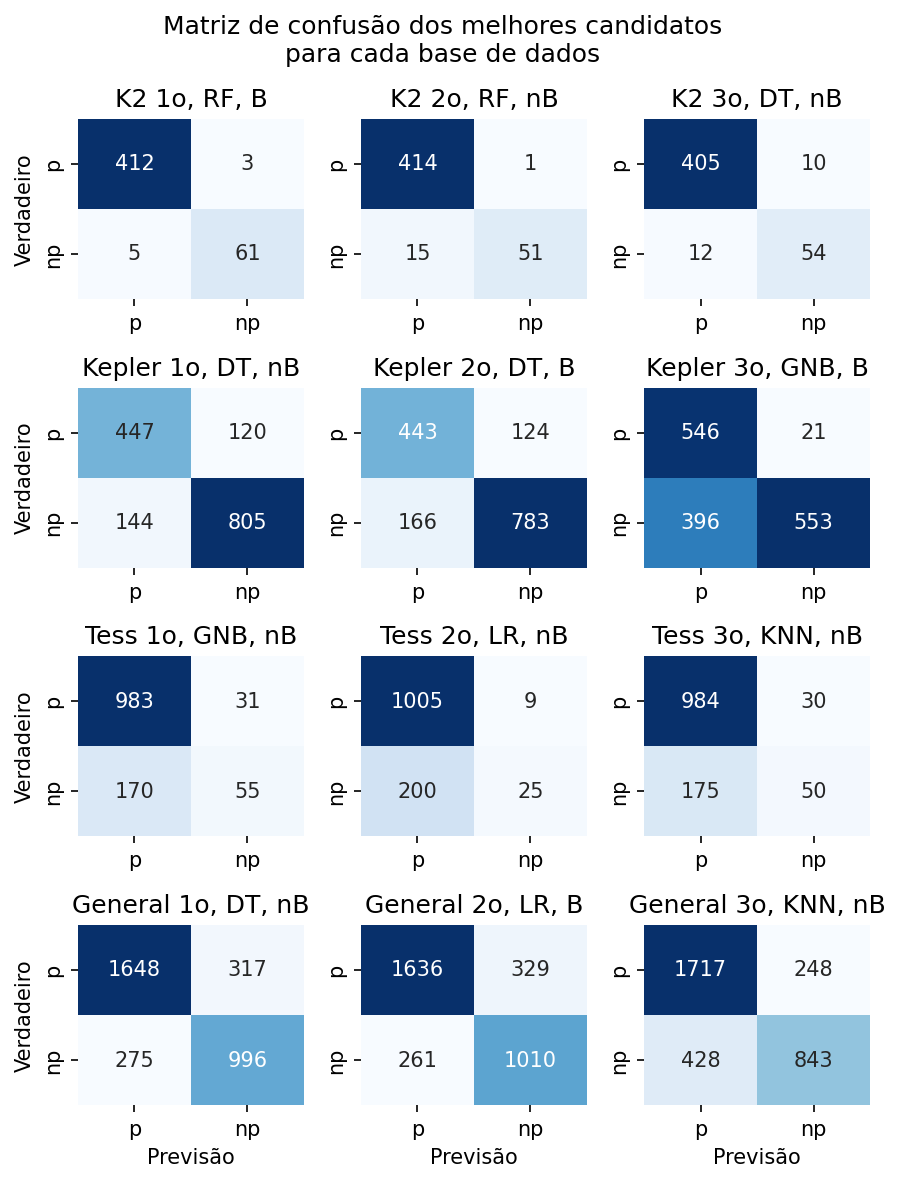

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(6, 8),dpi = 150)
# Linha 1, Coluna 1
cm = confusion_matrix(k2_base.y_k2_teste,k2_1_rf_bal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[0][0],cbar=False)
axes[0,0].set_title('K2 1o, RF, B')
axes[0,0].set_ylabel('Verdadeiro')
# Linha 1, Coluna 2
cm = confusion_matrix(k2_base.y_k2_teste,k2_2_rf_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[0][1],cbar=False)
axes[0,1].set_title('K2 2o, RF, nB')
# Linha 1, Coluna 3
cm = confusion_matrix(k2_base.y_k2_teste,k2_3_dt_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[0][2],cbar=False)
axes[0,2].set_title('K2 3o, DT, nB')
# Linha 2, Coluna 1
cm = confusion_matrix(kepler_base.y_kepler_teste,kepler_1_dt_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[1][0],cbar=False)
axes[1,0].set_title('Kepler 1o, DT, nB')
axes[1,0].set_ylabel('Verdadeiro')
# Linha 2, Coluna 2
cm = confusion_matrix(kepler_base.y_kepler_teste,kepler_2_dt_bal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[1][1],cbar=False)
axes[1,1].set_title('Kepler 2o, DT, B')
# Linha 2, Coluna 3
cm = confusion_matrix(kepler_base.y_kepler_teste,kepler_3_nb_bal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[1][2],cbar=False)
axes[1,2].set_title('Kepler 3o, GNB, B')
# Linha 3, Coluna 1
cm = confusion_matrix(tess_base.y_tess_teste,tess_1_nb_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[2][0],cbar=False)
axes[2,0].set_title('Tess 1o, GNB, nB')
axes[2,0].set_ylabel('Verdadeiro')
# Linha 3, Coluna 2
cm = confusion_matrix(tess_base.y_tess_teste,tess_2_lr_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[2][1],cbar=False)
axes[2,1].set_title('Tess 2o, LR, nB')
# Linha 3, Coluna 3
cm = confusion_matrix(tess_base.y_tess_teste,tess_3_knn_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[2][2],cbar=False)
axes[2,2].set_title('Tess 3o, KNN, nB')
# Linha 4, Coluna 1
cm = confusion_matrix(general_base.y_general_teste,general_1_dt_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[3][0],cbar=False)
axes[3,0].set_title('General 1o, DT, nB')
axes[3,0].set_ylabel('Verdadeiro')
axes[3,0].set_xlabel('Previsão')
# Linha 4, Coluna 2
cm = confusion_matrix(general_base.y_general_teste,general_2_dt_bal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[3][1],cbar=False)
axes[3,1].set_title('General 2o, LR, B')
axes[3,1].set_xlabel('Previsão')
# Linha 4, Coluna 3
cm = confusion_matrix(general_base.y_general_teste,general_3_knn_nbal_y_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[3][2],cbar=False)
axes[3,2].set_title('General 3o, KNN, nB')
axes[3,2].set_xlabel('Previsão')
# Título, formação e salvamento
plt.suptitle('Matriz de confusão dos melhores candidatos\npara cada base de dados')
plt.tight_layout()
plt.savefig('matriz_confusao_candidatos.png',dpi = 150)

Trabalhando os Hiperparametros e Validação cruzada

K2 RandomForestClassifier S
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=150; total time=   0.9s
[CV] END ..........

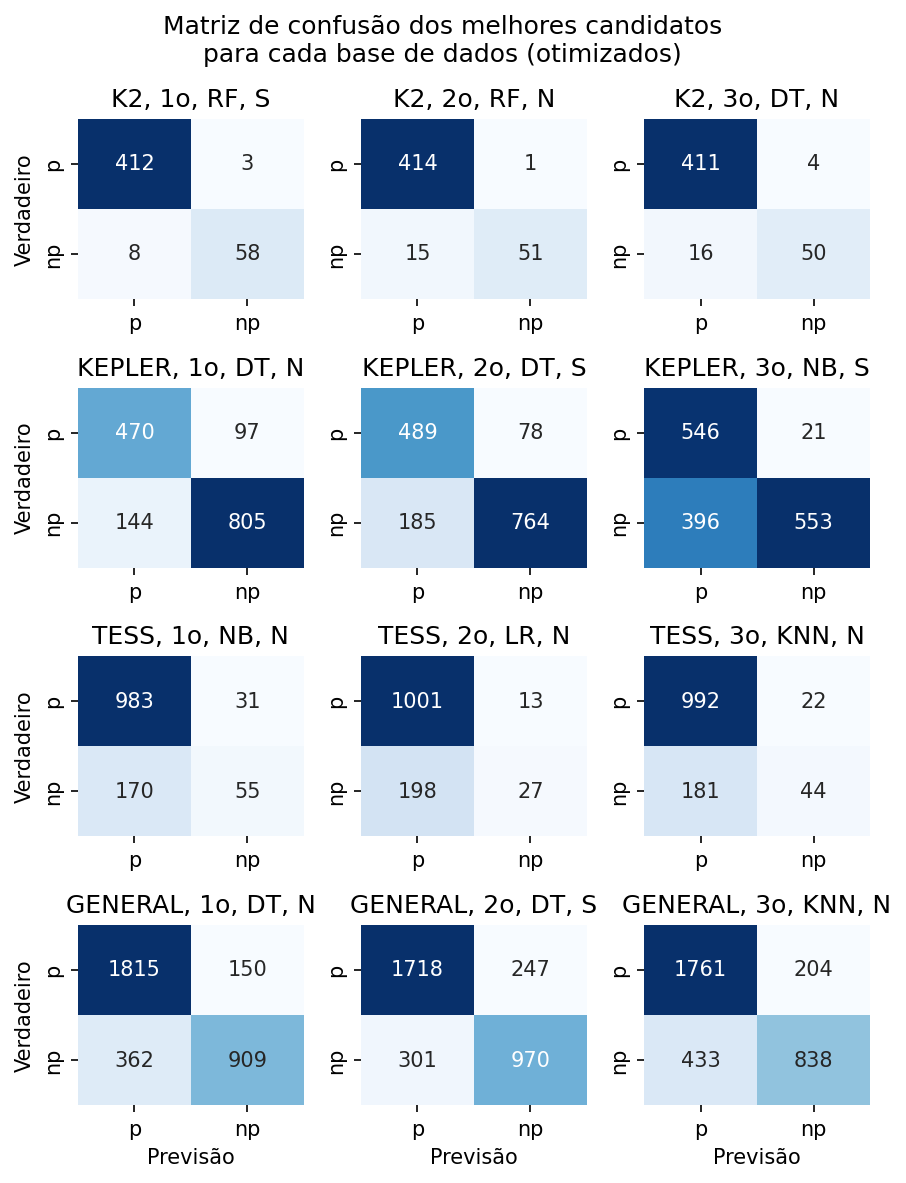

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, pos_label='planet',)

# Lista de dicionários contendo os classificadores e os respectivos hiperparâmetros para cada algoritmo
classificadores = [
    {'classificador': GaussianNB(), 'parametros': {}, 'sigla': 'NB'}, ### NaiveBayes não tem hiperparâmetros
    {'classificador': KNeighborsClassifier(), 'parametros': {
        'n_neighbors': [3, 5, 7, 9, 11,13, 15],
        'metric' : ['minkowski','manhattan']
    }, 'sigla': 'KNN'},
    {'classificador': DecisionTreeClassifier(random_state=42), 'parametros': {
        'max_depth':[None,5,10,15,20],
        'min_samples_split' :[0.1,0.5,2,4]
    }, 'sigla': 'DT'},
    {'classificador': LogisticRegression(random_state=42, max_iter=1000), 'parametros': {
        'C': [0.1, 0.25, 0.5, 1.0, 2.0, 8.0, 16.0],

    }, 'sigla': 'LR'},
    {'classificador': RandomForestClassifier(random_state=42), 'parametros': {
        'n_estimators': [50, 100, 150,200],
        'max_depth':[None,5,10,15,20],
    }, 'sigla': 'RF'},
]

# Lista para armazenar os melhores modelos para cada base
melhores_modelos = []

# Dicionário de especificidades:
dados_entrada = {
    'K2':{
        'S':[k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal],
        'N':[k2_base.x_k2_treino,k2_base.y_k2_treino],
        'test_data':[k2_base.x_k2_teste,k2_base.y_k2_teste]
    },
    'KEPLER':{
        'S':[kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal],
        'N':[kepler_base.x_kepler_treino,kepler_base.y_kepler_treino],
        'test_data':[kepler_base.x_kepler_teste,kepler_base.y_kepler_teste]
    },
    'TESS':{
        'S':[tess_base.x_tess_treino_bal,tess_base.y_tess_treino_bal],
        'N':[tess_base.x_tess_treino,tess_base.y_tess_treino],
        'test_data':[tess_base.x_tess_teste,tess_base.y_tess_teste]
    },
    'GENERAL':{
        'S':[general_base.x_general_treino_bal,general_base.y_general_treino_bal],
        'N':[general_base.x_general_treino,general_base.y_general_treino],
        'test_data':[general_base.x_general_teste,general_base.y_general_teste] 
    }
}

model_counts = {}
f1_scores = {}

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(6, 8),dpi = 150)

index = -1
base = ''
cont = 0

# Iterar sobre as melhores combinações para cada base
for _, combinacao in best_three.iterrows():
    if base != combinacao['Missao']:
        base = combinacao['Missao']
        index = index + 1
        cont = 0
    else:
        cont = cont + 1

    modelo = combinacao['Modelo']
    balanceamento = combinacao['Balanceamento']
    
     # Encontrar o classificador correspondente à combinação
    for item in classificadores:
        if item['classificador'].__class__.__name__ == modelo:
            classificador = item['classificador']
            parametros = item['parametros']
            sigla = item['sigla']
            break
   
    # Criar o objeto GridSearchCV
    print(base,modelo,balanceamento)
    grid_search = GridSearchCV(classificador, parametros, scoring=scorer, cv=5,verbose=2)

    # Separar os dados de entrada (X) e os rótulos (y) para a base atual
    X = dados_entrada[base][balanceamento][0]
    # Substitua 'target' pelo nome da coluna que contém os rótulos reais dos seus dados
    y = dados_entrada[base][balanceamento][1]

    # Ajustar o modelo com GridSearchCV
    grid_search.fit(X, y)
    
    # Calculando o F1 baseado no best_estimator_ retornado pelo grid_search
    best_estimator_y_pred = grid_search.best_estimator_.predict(dados_entrada[base]['test_data'][0])
    best_estimator_f1 = f1_score(dados_entrada[base]['test_data'][1],best_estimator_y_pred,pos_label='planet')

    # Armazenar o melhor modelo e os melhores parâmetros
    melhores_modelos.append({
        'Missao': base,
        'Modelo': modelo,
        'Balanceamento': balanceamento,
        'Melhores_Parametros': grid_search.best_params_,
        'Modelo Treinado': grid_search.best_estimator_,
        'Valores Y Previstos': best_estimator_y_pred,
        'F1 Modelo Melhores Parâmetros': best_estimator_f1,
    })

    key = (modelo, balanceamento)
    model_counts[key] = model_counts.get(key, 0) + 1
    f1_scores[f'{base},{modelo},{balanceamento} Parâmetros'] = grid_search.cv_results_['params']
    f1_scores[f'{base},{modelo},{balanceamento} Média F1 Splits'] = grid_search.cv_results_['mean_test_score']
    f1_scores[f'{base},{modelo},{balanceamento} STD F1 Splits'] = grid_search.cv_results_['std_test_score']
    
    # Fazer previsões nos dados de teste usando o melhor modelo encontrado
    y_pred = grid_search.best_estimator_.predict(dados_entrada[base]['test_data'][0])
    y_true = dados_entrada[base]['test_data'][1]

    cm = confusion_matrix(y_true,y_pred,labels=['planet', 'not planet'])
    cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])

    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = axes[index][cont],cbar=False)
    
    axes[index,cont].set_title(f'{base}, {cont+1}o, {sigla}, {balanceamento}')

    if cont == 0: 
        axes[index,cont].set_ylabel('Verdadeiro')
    if index == 3:
        axes[index,cont].set_xlabel('Previsão')

plt.suptitle('Matriz de confusão dos melhores candidatos\npara cada base de dados (otimizados)')
plt.tight_layout()
plt.savefig('matriz_confusao_candidatos_otimizado.png',dpi = 150)

# Criar DataFrame com os melhores modelos para cada base
melhores_modelos_df = pd.DataFrame(melhores_modelos)

In [47]:
melhores_modelos_df

,Missao,Modelo,Balanceamento,Melhores_Parametros,Modelo Treinado,Valores Y Previstos,F1 Modelo Melhores Parâmetros
0,K2,RandomForestClassifier,S,"{'max_depth': 15, 'n_estimators': 200}","(DecisionTreeClassifier(max_depth=15, max_feat...","[not planet, planet, planet, planet, planet, p...",0.986826
1,K2,RandomForestClassifier,N,"{'max_depth': None, 'n_estimators': 150}","(DecisionTreeClassifier(max_features='sqrt', r...","[not planet, planet, planet, planet, planet, p...",0.981043
2,K2,DecisionTreeClassifier,N,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, planet, planet, planet, p...",0.976247
3,KEPLER,DecisionTreeClassifier,N,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.795936
4,KEPLER,DecisionTreeClassifier,S,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.788074
5,KEPLER,GaussianNB,S,{},GaussianNB(),"[planet, planet, not planet, not planet, not p...",0.723658
6,TESS,GaussianNB,N,{},GaussianNB(),"[planet, planet, planet, planet, planet, plane...",0.907245
7,TESS,LogisticRegression,N,{'C': 16.0},"LogisticRegression(C=16.0, max_iter=1000, rand...","[planet, planet, planet, planet, planet, plane...",0.904654
8,TESS,KNeighborsClassifier,N,"{'metric': 'manhattan', 'n_neighbors': 13}","KNeighborsClassifier(metric='manhattan', n_nei...","[planet, planet, planet, planet, planet, plane...",0.907179
9,GENERAL,DecisionTreeClassifier,N,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[planet, not planet, planet, planet, not plane...",0.876388


Unindo best_three (melhores modelos ANTES da otimização dos hiperparametros) com melhores_modelos_df (melhores modelos DEPOIS da otimização)

In [48]:
resultados_combinados = pd.merge(best_three,melhores_modelos_df,on = ['Missao','Modelo','Balanceamento'],how = 'left')

In [49]:
resultados_combinados['Tunado Melhor'] = np.where(resultados_combinados['F1']<resultados_combinados['F1 Modelo Melhores Parâmetros'],1,0)

In [50]:
resultados_combinados

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1,Melhores_Parametros,Modelo Treinado,Valores Y Previstos,F1 Modelo Melhores Parâmetros,Tunado Melhor
0,K2,RandomForestClassifier,S,0.983368,0.988010,0.992771,0.990385,"{'max_depth': 15, 'n_estimators': 200}","(DecisionTreeClassifier(max_depth=15, max_feat...","[not planet, planet, planet, planet, planet, p...",0.986826,0
1,K2,RandomForestClassifier,N,0.966736,0.965035,0.997590,0.981043,"{'max_depth': None, 'n_estimators': 150}","(DecisionTreeClassifier(max_features='sqrt', r...","[not planet, planet, planet, planet, planet, p...",0.981043,0
2,K2,DecisionTreeClassifier,N,0.954262,0.971223,0.975904,0.973558,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, planet, planet, planet, p...",0.976247,1
3,KEPLER,DecisionTreeClassifier,N,0.825858,0.756345,0.788360,0.772021,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.795936,1
4,KEPLER,DecisionTreeClassifier,S,0.808707,0.727422,0.781305,0.753401,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.788074,1
5,KEPLER,GaussianNB,S,0.724934,0.579618,0.962963,0.723658,{},GaussianNB(),"[planet, planet, not planet, not planet, not p...",0.723658,0
6,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245,{},GaussianNB(),"[planet, planet, planet, planet, planet, plane...",0.907245,0
7,TESS,LogisticRegression,N,0.831316,0.834025,0.991124,0.905813,{'C': 16.0},"LogisticRegression(C=16.0, max_iter=1000, rand...","[planet, planet, planet, planet, planet, plane...",0.904654,0
8,TESS,KNeighborsClassifier,N,0.834544,0.849008,0.970414,0.905660,"{'metric': 'manhattan', 'n_neighbors': 13}","KNeighborsClassifier(metric='manhattan', n_nei...","[planet, planet, planet, planet, planet, plane...",0.907179,1
9,GENERAL,DecisionTreeClassifier,N,0.819221,0.862015,0.836132,0.848876,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[planet, not planet, planet, planet, not plane...",0.876388,1


Classificador por votação

In [51]:
from sklearn.ensemble import VotingClassifier

### k2

### instanciando os melhores conforme a tabela resultados_combinados. 
### Caso a ultima coluna seja igual a 1, pega os parametros

k2_1o = RandomForestClassifier(random_state=42)
k2_2o = RandomForestClassifier(random_state=42)
k2_3o  = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=4)

### retreinando os modelos com suas respectivas bases
k2_1o.fit(k2_base.x_k2_treino_bal,k2_base.y_k2_treino_bal)
k2_2o.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)
k2_3o.fit(k2_base.x_k2_treino,k2_base.y_k2_treino)

### instanciando e treinando o VotingClassifier baseado nos três modelos acima:
k2_voting = VotingClassifier(estimators=[
    ('k2_1o', k2_1o), 
    ('k2_2o', k2_2o), 
    ('k2_3o', k2_3o)], 
    voting='hard')

### não é preciso treinar o voting classifier, pois os modelos fornecidos já estão treinados, mas é necessário usar o fit
k2_voting.fit(k2_base.x_k2_treino, k2_base.y_k2_treino)

### testando
y_k2_voting_pred = k2_voting.predict(k2_base.x_k2_teste)

### levantando métricas
print(accuracy_score(k2_base.y_k2_teste,y_k2_voting_pred))
print(precision_score(k2_base.y_k2_teste,y_k2_voting_pred,pos_label = 'planet'))
print(recall_score(k2_base.y_k2_teste,y_k2_voting_pred,pos_label = 'planet'))
print(f1_score(k2_base.y_k2_teste,y_k2_voting_pred,pos_label = 'planet'))


0.9667359667359667
0.965034965034965
0.9975903614457832
0.981042654028436


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\3604321725.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


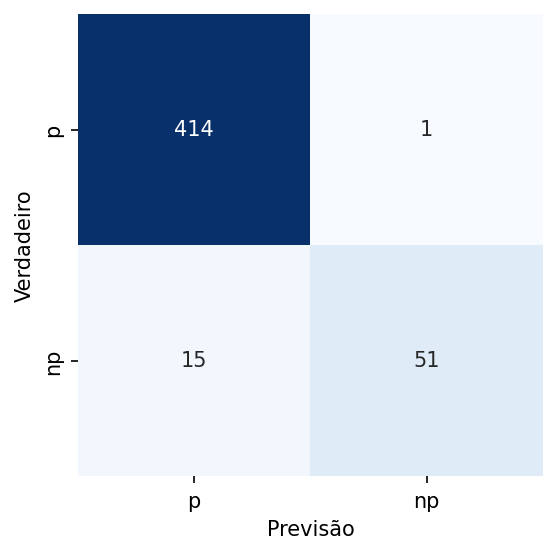

In [52]:
fix,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
cm = confusion_matrix(k2_base.y_k2_teste,y_k2_voting_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = ax,cbar=False)
axes[index,cont].set_title(f'{base}, {cont+1}o, {sigla}, {balanceamento}')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsão')
fig.tight_layout()
fig.show()

In [53]:
### kepler

### instanciando os melhores conforme a tabela resultados_combinados. 
### Caso a ultima coluna seja igual a 1, pega os parametros

kepler_1o = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=4)
kepler_2o = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=4)
kepler_3o = GaussianNB()

### retreinando os modelos com suas respectivas bases
kepler_1o.fit(kepler_base.x_kepler_treino,kepler_base.y_kepler_treino)
kepler_2o.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)
kepler_3o.fit(kepler_base.x_kepler_treino_bal,kepler_base.y_kepler_treino_bal)

### instanciando e treinando o VotingClassifier baseado nos três modelos acima:
kepler_voting = VotingClassifier(estimators=[
    ('kepler_1o', kepler_1o), 
    ('kepler_2o', kepler_2o), 
    ('kepler_3o', kepler_3o)], 
    voting='hard')

### não é preciso treinar o voting classifier, pois os modelos fornecidos já estão treinados, mas é necessário usar o fit
kepler_voting.fit(kepler_base.x_kepler_treino, kepler_base.y_kepler_treino)

### testando
y_kepler_voting_pred = kepler_voting.predict(kepler_base.x_kepler_teste)

### levantando métricas
print(accuracy_score(kepler_base.y_kepler_teste,y_kepler_voting_pred))
print(precision_score(kepler_base.y_kepler_teste,y_kepler_voting_pred,pos_label = 'planet'))
print(recall_score(kepler_base.y_kepler_teste,y_kepler_voting_pred,pos_label = 'planet'))
print(f1_score(kepler_base.y_kepler_teste,y_kepler_voting_pred,pos_label = 'planet'))


0.8410290237467019
0.7654723127035831
0.8289241622574955
0.7959356477561389


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\3234303371.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


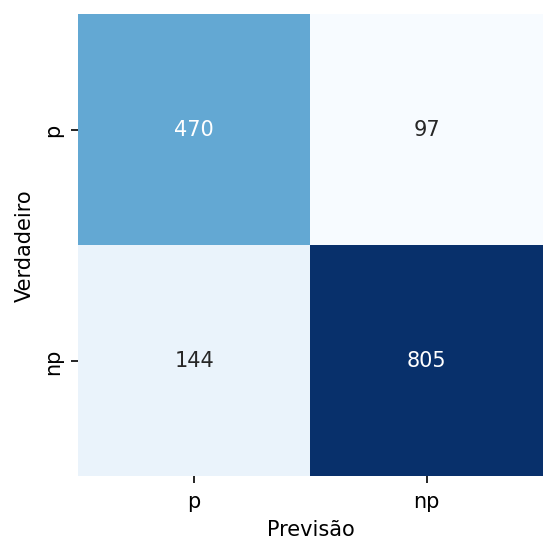

In [54]:
fix,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
cm = confusion_matrix(kepler_base.y_kepler_teste,y_kepler_voting_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = ax,cbar=False)
axes[index,cont].set_title(f'{base}, {cont+1}o, {sigla}, {balanceamento}')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsão')
fig.tight_layout()
fig.show()

In [55]:
### tess

### instanciando os melhores conforme a tabela resultados_combinados. 
### Caso a ultima coluna seja igual a 1, pega os parametros

tess_1o = GaussianNB()
tess_2o = LogisticRegression(random_state=42)
tess_3o = KNeighborsClassifier(metric='manhattan', n_neighbors=13)

### retreinando os modelos com suas respectivas bases
tess_1o.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
tess_2o.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)
tess_3o.fit(tess_base.x_tess_treino,tess_base.y_tess_treino)

### instanciando e treinando o VotingClassifier baseado nos três modelos acima:
tess_voting = VotingClassifier(estimators=[
    ('tess_1o', tess_1o), 
    ('tess_2o', tess_2o), 
    ('tess_3o', tess_3o)], 
    voting='hard')

### não é preciso treinar o voting classifier, pois os modelos fornecidos já estão treinados, mas é necessário usar o fit
tess_voting.fit(tess_base.x_tess_treino, tess_base.y_tess_treino)

### testando
y_tess_voting_pred = tess_voting.predict(tess_base.x_tess_teste)

### levantando métricas
print(accuracy_score(tess_base.y_tess_teste,y_tess_voting_pred))
print(precision_score(tess_base.y_tess_teste,y_tess_voting_pred,pos_label = 'planet'))
print(recall_score(tess_base.y_tess_teste,y_tess_voting_pred,pos_label = 'planet'))
print(f1_score(tess_base.y_tess_teste,y_tess_voting_pred,pos_label = 'planet'))


0.8337368845843423
0.8377926421404682
0.9881656804733728
0.9067873303167421


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\2903664473.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


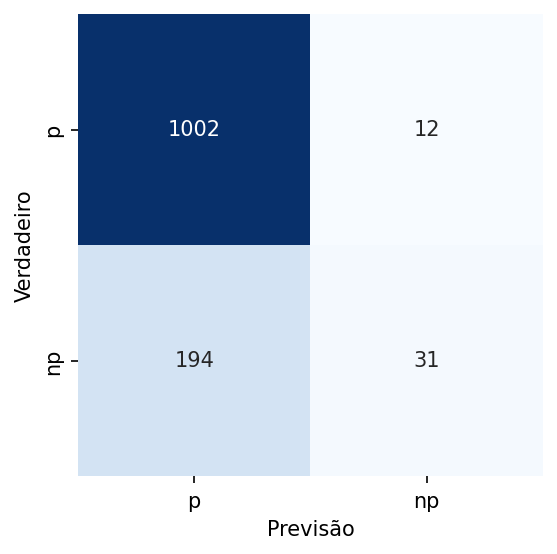

In [56]:
fix,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
cm = confusion_matrix(tess_base.y_tess_teste,y_tess_voting_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = ax,cbar=False)
axes[index,cont].set_title(f'{base}, {cont+1}o, {sigla}, {balanceamento}')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsão')
fig.tight_layout()
fig.show()

In [57]:
### general

### instanciando os melhores conforme a tabela resultados_combinados. 
### Caso a ultima coluna seja igual a 1, pega os parametros

general_1o = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=4)
general_2o = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=4)
general_3o = KNeighborsClassifier(metric='manhattan', n_neighbors=15)

### retreinando os modelos com suas respectivas bases
general_1o.fit(general_base.x_general_treino,general_base.y_general_treino)
general_2o.fit(general_base.x_general_treino_bal,general_base.y_general_treino_bal)
general_3o.fit(general_base.x_general_treino,general_base.y_general_treino)

### instanciando e treinando o VotingClassifier baseado nos três modelos acima:
general_voting = VotingClassifier(estimators=[
    ('general_1o', general_1o), 
    ('general_2o', general_2o), 
    ('general_3o', general_3o)], 
    voting='hard')

### não é preciso treinar o voting classifier, pois os modelos fornecidos já estão treinados, mas é necessário usar o fit
general_voting.fit(general_base.x_general_treino, general_base.y_general_treino)

### testando
y_general_voting_pred = general_voting.predict(general_base.x_general_teste)

### levantando métricas
print(accuracy_score(general_base.y_general_teste,y_general_voting_pred))
print(precision_score(general_base.y_general_teste,y_general_voting_pred,pos_label = 'planet'))
print(recall_score(general_base.y_general_teste,y_general_voting_pred,pos_label = 'planet'))
print(f1_score(general_base.y_general_teste,y_general_voting_pred,pos_label = 'planet'))


0.8417799752781211
0.8337161231051906
0.9236641221374046
0.8763882182520522


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\3559754581.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


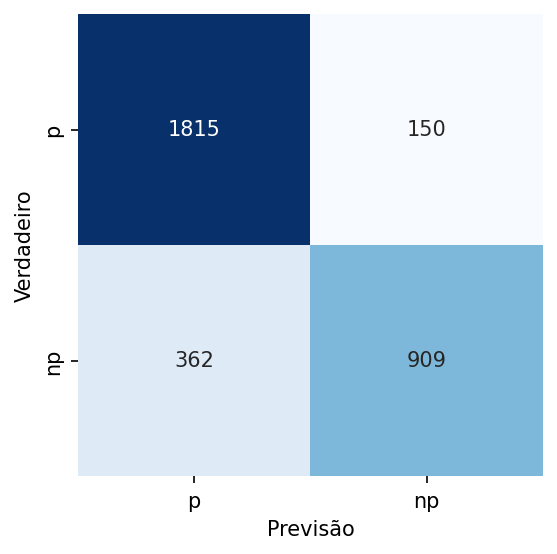

In [58]:
fix,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
cm = confusion_matrix(general_base.y_general_teste,y_general_voting_pred,labels=['planet', 'not planet'])
cm_df = pd.DataFrame(cm, index=['p', 'np'], columns=['p', 'np'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', ax = ax,cbar=False)
axes[index,cont].set_title(f'{base}, {cont+1}o, {sigla}, {balanceamento}')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsão')
fig.tight_layout()
fig.show()

Treinando os 4 melhores modelos baseados em cada base:

In [59]:
resultados_combinados

,Missao,Modelo,Balanceamento,Accuracy,Precision,Recall,F1,Melhores_Parametros,Modelo Treinado,Valores Y Previstos,F1 Modelo Melhores Parâmetros,Tunado Melhor
0,K2,RandomForestClassifier,S,0.983368,0.988010,0.992771,0.990385,"{'max_depth': 15, 'n_estimators': 200}","(DecisionTreeClassifier(max_depth=15, max_feat...","[not planet, planet, planet, planet, planet, p...",0.986826,0
1,K2,RandomForestClassifier,N,0.966736,0.965035,0.997590,0.981043,"{'max_depth': None, 'n_estimators': 150}","(DecisionTreeClassifier(max_features='sqrt', r...","[not planet, planet, planet, planet, planet, p...",0.981043,0
2,K2,DecisionTreeClassifier,N,0.954262,0.971223,0.975904,0.973558,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, planet, planet, planet, p...",0.976247,1
3,KEPLER,DecisionTreeClassifier,N,0.825858,0.756345,0.788360,0.772021,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.795936,1
4,KEPLER,DecisionTreeClassifier,S,0.808707,0.727422,0.781305,0.753401,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[not planet, planet, not planet, not planet, n...",0.788074,1
5,KEPLER,GaussianNB,S,0.724934,0.579618,0.962963,0.723658,{},GaussianNB(),"[planet, planet, not planet, not planet, not p...",0.723658,0
6,TESS,GaussianNB,N,0.837772,0.852559,0.969428,0.907245,{},GaussianNB(),"[planet, planet, planet, planet, planet, plane...",0.907245,0
7,TESS,LogisticRegression,N,0.831316,0.834025,0.991124,0.905813,{'C': 16.0},"LogisticRegression(C=16.0, max_iter=1000, rand...","[planet, planet, planet, planet, planet, plane...",0.904654,0
8,TESS,KNeighborsClassifier,N,0.834544,0.849008,0.970414,0.905660,"{'metric': 'manhattan', 'n_neighbors': 13}","KNeighborsClassifier(metric='manhattan', n_nei...","[planet, planet, planet, planet, planet, plane...",0.907179,1
9,GENERAL,DecisionTreeClassifier,N,0.819221,0.862015,0.836132,0.848876,"{'max_depth': 10, 'min_samples_split': 4}","DecisionTreeClassifier(max_depth=10, min_sampl...","[planet, not planet, planet, planet, not plane...",0.876388,1


In [60]:
from imblearn.combine import SMOTETomek

### k2: não tunado, não há necessidade de buscar os melhores hiperparametros na tabela resultados_combinados, mas conforme a tabela, há necessidade de balancear a base!
k2_smt = SMOTETomek(random_state=42)
x_k2_bal, y_k2_bal = k2_smt.fit_resample(k2_base.x_k2,k2_base.y_k2)
k2_modelo_top = RandomForestClassifier(random_state=42)
k2_modelo_top.fit(x_k2_bal, y_k2_bal)

### kepler: tunado! melhores hiperparâmetros disponíveis na tabela. não há necessidade de balanceamento
kepler_tabela_resultados = resultados_combinados[resultados_combinados['Missao'] == 'KEPLER'] # filtrando kepler_tabela_resultados
kepler_melhores_parametros = kepler_tabela_resultados['Melhores_Parametros'][kepler_tabela_resultados.first_valid_index()] # selecionando o valor de Melhores_Parametros da primeira linha do df filtrado independente do primeiro indice que for
kepler_modelo_top = DecisionTreeClassifier(random_state=42,**kepler_melhores_parametros)
kepler_modelo_top.fit(kepler_base.x_kepler,kepler_base.y_kepler)

### tess: não tunado, não há necessidade de buscar os melhores hiperparametros na tabela resultados_combinados. não há necessidade de balanceamento
tess_modelo_top = GaussianNB()
tess_modelo_top.fit(tess_base.x_tess,tess_base.y_tess)

### general: tunado! melhores hiperparâmetros disponíveis na tabela. não há necessidade de balanceamento
general_tabela_resultados = resultados_combinados[resultados_combinados['Missao'] == 'GENERAL'] # filtrando kepler_tabela_resultados
general_melhores_parametros = general_tabela_resultados['Melhores_Parametros'][general_tabela_resultados.first_valid_index()] # selecionando o valor de Melhores_Parametros da primeira linha do df filtrado independente do primeiro indice que for
general_modelo_top = DecisionTreeClassifier(random_state=42,**general_melhores_parametros)
general_modelo_top.fit(general_base.x_general,general_base.y_general)


DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42)

Agora vamos classificar os candidatos da K2 com os 4 modelos

In [61]:
y_k2_modelo_k2 = k2_modelo_top.predict(k2_base.k2_candidate)
y_k2_modelo_kepler = kepler_modelo_top.predict(k2_base.k2_candidate)
y_k2_modelo_tess = tess_modelo_top.predict(k2_base.k2_candidate)
y_k2_modelo_general = general_modelo_top.predict(k2_base.k2_candidate)

In [62]:
## colocar cada resultado como uma coluna nova na base de candidato k2 (mas copiando a base para nao alterar a original)
k2_candidates_predict = k2_base.k2_candidate.copy()
k2_candidates_predict['predict_modelo_k2'] = y_k2_modelo_k2
k2_candidates_predict['predict_modelo_kepler'] = y_k2_modelo_kepler
k2_candidates_predict['predict_modelo_tess'] = y_k2_modelo_tess
k2_candidates_predict['predict_modelo_general'] = y_k2_modelo_general

Explorando os resultados da classificação dos candidatos de K2

In [63]:
k2_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general
3,0.502759,0.414973,0.047458,0.007657,0.000661,0.397221,0.010069,0.789174,0.000025,0.018907,0.000276,planet,not planet,planet,planet
4,0.502759,0.414973,0.049801,0.007068,0.000840,0.383335,0.010069,0.777778,0.000025,0.023412,0.000469,planet,not planet,planet,planet
5,0.480060,0.421694,0.031669,0.005419,0.003505,0.230088,0.030773,0.744748,0.000012,0.001957,0.008308,planet,not planet,planet,planet
6,0.495656,0.422120,0.056479,0.008010,0.008806,0.266966,0.012272,0.826211,0.000072,0.020792,0.024325,planet,not planet,planet,planet
7,0.495656,0.422120,0.049784,0.008717,0.007812,0.281978,0.012272,0.766382,0.000072,0.018180,0.016691,planet,not planet,planet,planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.369106,0.921838,0.094169,0.019437,0.004859,0.387111,0.069500,0.663818,0.000367,0.019323,0.003677,not planet,not planet,planet,not planet
1774,0.363331,0.942892,0.079229,0.011662,0.002037,0.349137,0.037012,0.723647,0.000137,0.016809,0.000808,planet,not planet,planet,not planet
1777,0.547285,0.491266,0.056660,0.012369,0.019943,0.315575,0.337544,0.783476,0.000168,0.011583,0.055323,not planet,not planet,not planet,planet
1778,0.569844,0.493370,0.054781,0.006950,0.002097,0.399843,0.040621,0.826211,0.000129,0.017501,0.002193,planet,not planet,planet,planet


In [64]:
k2_candidates_predict.predict_modelo_k2.value_counts()

predict_modelo_k2
planet        939
not planet    431
Name: count, dtype: int64

In [65]:
k2_candidates_predict.predict_modelo_kepler.value_counts()

predict_modelo_kepler
not planet    1328
planet          42
Name: count, dtype: int64

In [66]:
k2_candidates_predict.predict_modelo_tess.value_counts()

predict_modelo_tess
planet        1130
not planet     240
Name: count, dtype: int64

In [67]:
k2_candidates_predict.predict_modelo_general.value_counts()

predict_modelo_general
not planet    694
planet        676
Name: count, dtype: int64

Para os candidatos da missão K2, o modelo Kepler é muito pessimista e Tess é muito otimista, enquanto k2 e, principalmente, general, são mais moderados

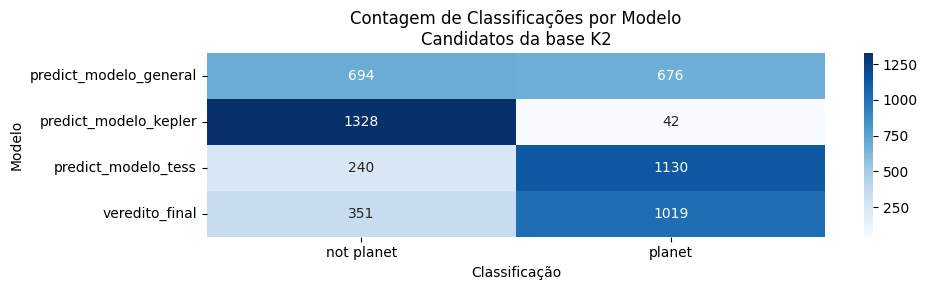

In [95]:
k2_candidates_values = k2_candidates_predict.iloc[:,-4:]
k2_candidates_values_long = k2_candidates_values.melt(var_name='Modelo', value_name='Classificacão')
k2_candidates_values_long_count = k2_candidates_values_long.groupby(['Modelo', 'Classificacão']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 3))
sns.heatmap(k2_candidates_values_long_count, annot=True, cmap='Blues', fmt='d')
plt.title('Contagem de Classificações por Modelo\nCandidatos da base K2')
plt.ylabel('Modelo')
plt.xlabel('Classificação')
plt.tight_layout()
plt.show()

Utilizar uma regra para um veredito final: se pelo menos dois modelos classificaram como planet, será considerado planet, do contrário será considerado not planet

In [69]:
k2_candidates_predict['veredito_final'] = (k2_candidates_predict[[
    'predict_modelo_k2',
    'predict_modelo_kepler',
    'predict_modelo_tess',
    'predict_modelo_general',
]] == 'planet').sum(axis=1).apply(lambda x: 'planet' if x >= 2 else 'not planet')
k2_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general,veredito_final
3,0.502759,0.414973,0.047458,0.007657,0.000661,0.397221,0.010069,0.789174,0.000025,0.018907,0.000276,planet,not planet,planet,planet,planet
4,0.502759,0.414973,0.049801,0.007068,0.000840,0.383335,0.010069,0.777778,0.000025,0.023412,0.000469,planet,not planet,planet,planet,planet
5,0.480060,0.421694,0.031669,0.005419,0.003505,0.230088,0.030773,0.744748,0.000012,0.001957,0.008308,planet,not planet,planet,planet,planet
6,0.495656,0.422120,0.056479,0.008010,0.008806,0.266966,0.012272,0.826211,0.000072,0.020792,0.024325,planet,not planet,planet,planet,planet
7,0.495656,0.422120,0.049784,0.008717,0.007812,0.281978,0.012272,0.766382,0.000072,0.018180,0.016691,planet,not planet,planet,planet,planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.369106,0.921838,0.094169,0.019437,0.004859,0.387111,0.069500,0.663818,0.000367,0.019323,0.003677,not planet,not planet,planet,not planet,not planet
1774,0.363331,0.942892,0.079229,0.011662,0.002037,0.349137,0.037012,0.723647,0.000137,0.016809,0.000808,planet,not planet,planet,not planet,planet
1777,0.547285,0.491266,0.056660,0.012369,0.019943,0.315575,0.337544,0.783476,0.000168,0.011583,0.055323,not planet,not planet,not planet,planet,not planet
1778,0.569844,0.493370,0.054781,0.006950,0.002097,0.399843,0.040621,0.826211,0.000129,0.017501,0.002193,planet,not planet,planet,planet,planet


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\3348731519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')


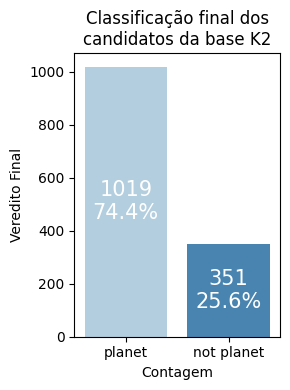

In [102]:
veredito_counts = k2_candidates_predict['veredito_final'].value_counts()
total = veredito_counts.sum()
plt.figure(figsize=(3,4))
barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')
for p in barplot.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    barplot.annotate(f'{int(height)}\n{percentage}', 
                     (p.get_x() + p.get_width() / 2., height / 2), 
                     ha = 'center', va = 'center', 
                     color='white', size=15)
plt.title('Classificação final dos\ncandidatos da base K2')
plt.xlabel('Contagem')
plt.ylabel('Veredito Final')
plt.tight_layout()
plt.show()

KEPLER

In [71]:
y_kepler_modelo_k2 = k2_modelo_top.predict(kepler_base.kepler_candidate)
y_kepler_modelo_kepler = kepler_modelo_top.predict(kepler_base.kepler_candidate)
y_kepler_modelo_tess = tess_modelo_top.predict(kepler_base.kepler_candidate)
y_kepler_modelo_general = general_modelo_top.predict(kepler_base.kepler_candidate)

In [72]:
kepler_candidates_predict = kepler_base.kepler_candidate.copy()
kepler_candidates_predict['predict_modelo_k2'] = y_kepler_modelo_k2
kepler_candidates_predict['predict_modelo_kepler'] = y_kepler_modelo_kepler
kepler_candidates_predict['predict_modelo_tess'] = y_kepler_modelo_tess
kepler_candidates_predict['predict_modelo_general'] = y_kepler_modelo_general

In [73]:
kepler_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general
2,0.784346,0.733360,0.241179,0.003303,0.000072,0.041866,0.043481,0.845778,0.000151,3.589843e-06,0.007025,planet,not planet,not planet,not planet
58,0.661428,0.856854,0.210427,0.002924,0.000037,0.030187,0.064050,0.838819,0.000309,1.031281e-06,0.004059,planet,not planet,not planet,planet
62,0.639316,0.866381,0.177106,0.002855,0.000097,0.048422,0.020238,0.855370,0.000054,6.268980e-06,0.000361,planet,not planet,not planet,not planet
63,0.367413,0.615463,0.235587,0.004256,0.000002,0.085166,0.012085,0.807222,0.000025,5.641534e-05,0.000015,planet,planet,not planet,planet
84,0.522645,0.105611,0.251379,0.003164,0.000038,0.053749,0.026376,0.845213,0.000076,9.400273e-06,0.003725,planet,planet,not planet,planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,0.249449,0.650591,0.274726,0.009182,0.000008,0.096913,0.024362,0.722776,0.000054,9.389768e-05,0.000030,planet,planet,not planet,planet
9542,0.537397,0.659696,0.269739,0.003681,0.000016,0.016391,0.327384,0.835245,0.002893,1.059597e-07,0.000740,planet,not planet,not planet,not planet
9552,0.817689,0.658950,0.219796,0.003246,0.000018,0.013864,0.315252,0.848975,0.002829,5.846054e-08,0.000844,planet,not planet,not planet,not planet
9560,0.304401,0.671749,0.261277,0.004012,0.000003,0.108114,0.007385,0.826970,0.000012,1.448552e-04,0.000031,planet,planet,not planet,planet


In [74]:
kepler_candidates_predict.predict_modelo_k2.value_counts()

predict_modelo_k2
planet        1976
not planet       8
Name: count, dtype: int64

In [75]:
kepler_candidates_predict.predict_modelo_kepler.value_counts()

predict_modelo_kepler
not planet    1072
planet         912
Name: count, dtype: int64

In [76]:
kepler_candidates_predict.predict_modelo_tess.value_counts()

predict_modelo_tess
not planet    1827
planet         157
Name: count, dtype: int64

In [77]:
kepler_candidates_predict.predict_modelo_general.value_counts()

predict_modelo_general
planet        1042
not planet     942
Name: count, dtype: int64

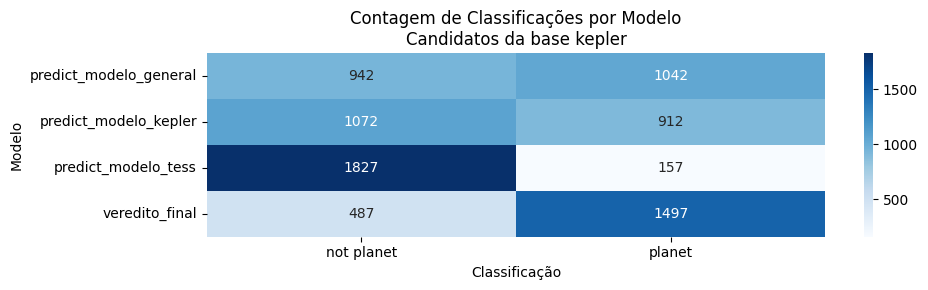

In [96]:
kepler_candidates_values = kepler_candidates_predict.iloc[:,-4:]
kepler_candidates_values_long = kepler_candidates_values.melt(var_name='Modelo', value_name='Classificacão')
kepler_candidates_values_long_count = kepler_candidates_values_long.groupby(['Modelo', 'Classificacão']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 3))
sns.heatmap(kepler_candidates_values_long_count, annot=True, cmap='Blues', fmt='d')
plt.title('Contagem de Classificações por Modelo\nCandidatos da base kepler')
plt.ylabel('Modelo')
plt.xlabel('Classificação')
plt.tight_layout()
plt.show()

In [79]:
kepler_candidates_predict['veredito_final'] = (kepler_candidates_predict[[
    'predict_modelo_k2',
    'predict_modelo_kepler',
    'predict_modelo_tess',
    'predict_modelo_general',
]] == 'planet').sum(axis=1).apply(lambda x: 'planet' if x >= 2 else 'not planet')
kepler_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general,veredito_final
2,0.784346,0.733360,0.241179,0.003303,0.000072,0.041866,0.043481,0.845778,0.000151,3.589843e-06,0.007025,planet,not planet,not planet,not planet,not planet
58,0.661428,0.856854,0.210427,0.002924,0.000037,0.030187,0.064050,0.838819,0.000309,1.031281e-06,0.004059,planet,not planet,not planet,planet,planet
62,0.639316,0.866381,0.177106,0.002855,0.000097,0.048422,0.020238,0.855370,0.000054,6.268980e-06,0.000361,planet,not planet,not planet,not planet,not planet
63,0.367413,0.615463,0.235587,0.004256,0.000002,0.085166,0.012085,0.807222,0.000025,5.641534e-05,0.000015,planet,planet,not planet,planet,planet
84,0.522645,0.105611,0.251379,0.003164,0.000038,0.053749,0.026376,0.845213,0.000076,9.400273e-06,0.003725,planet,planet,not planet,planet,planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,0.249449,0.650591,0.274726,0.009182,0.000008,0.096913,0.024362,0.722776,0.000054,9.389768e-05,0.000030,planet,planet,not planet,planet,planet
9542,0.537397,0.659696,0.269739,0.003681,0.000016,0.016391,0.327384,0.835245,0.002893,1.059597e-07,0.000740,planet,not planet,not planet,not planet,not planet
9552,0.817689,0.658950,0.219796,0.003246,0.000018,0.013864,0.315252,0.848975,0.002829,5.846054e-08,0.000844,planet,not planet,not planet,not planet,not planet
9560,0.304401,0.671749,0.261277,0.004012,0.000003,0.108114,0.007385,0.826970,0.000012,1.448552e-04,0.000031,planet,planet,not planet,planet,planet


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\3024274931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')


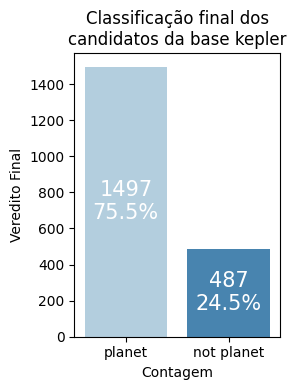

In [103]:
veredito_counts = kepler_candidates_predict['veredito_final'].value_counts()
total = veredito_counts.sum()
plt.figure(figsize=(3,4))
barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')

for p in barplot.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    barplot.annotate(f'{int(height)}\n{percentage}', 
                     (p.get_x() + p.get_width() / 2., height / 2), 
                     ha = 'center', va = 'center', 
                     color='white', size=15)
    
plt.title('Classificação final dos\ncandidatos da base kepler')
plt.xlabel('Contagem')
plt.ylabel('Veredito Final')
plt.tight_layout()
plt.show()

In [81]:
y_tess_modelo_k2 = k2_modelo_top.predict(tess_base.tess_candidate)
y_tess_modelo_kepler = kepler_modelo_top.predict(tess_base.tess_candidate)
y_tess_modelo_tess = tess_modelo_top.predict(tess_base.tess_candidate)
y_tess_modelo_general = general_modelo_top.predict(tess_base.tess_candidate)

In [82]:
tess_candidates_predict = tess_base.tess_candidate.copy()
tess_candidates_predict['predict_modelo_k2'] = y_tess_modelo_k2
tess_candidates_predict['predict_modelo_kepler'] = y_tess_modelo_kepler
tess_candidates_predict['predict_modelo_tess'] = y_tess_modelo_tess
tess_candidates_predict['predict_modelo_general'] = y_tess_modelo_general

In [83]:
tess_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general
13,0.325166,0.539076,0.129683,0.025562,0.081807,0.793758,0.019660,0.651805,0.000401,0.399326,0.003700,not planet,not planet,not planet,not planet
44,0.415741,0.171994,0.064516,0.010311,0.043717,0.184125,0.194121,0.733551,0.002339,0.000507,0.004843,not planet,not planet,planet,planet
59,0.937688,0.077425,0.066753,0.014376,0.008465,0.152132,0.008373,0.723469,0.004925,0.000865,0.000662,planet,not planet,planet,not planet
61,0.839324,0.196877,0.070224,0.010353,0.006345,0.127980,0.005563,0.718147,0.008415,0.000314,0.000968,planet,not planet,planet,not planet
62,0.814793,0.195671,0.063052,0.008391,0.008808,0.116688,0.003446,0.750642,0.009491,0.000221,0.002169,planet,not planet,planet,not planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,0.171896,0.359897,0.062468,0.017811,0.028672,0.254391,0.015775,0.644980,0.001936,0.004488,0.004057,planet,not planet,planet,not planet
6985,0.231017,0.391449,0.062237,0.012905,0.046449,0.574184,0.019739,0.689343,0.000239,0.110591,0.003284,planet,not planet,not planet,not planet
6996,0.319724,0.512830,0.030537,0.006919,0.010445,0.151349,0.004804,0.738826,0.000916,0.000597,0.003700,planet,not planet,planet,not planet
7013,0.333532,0.559007,0.115835,0.015063,0.031704,0.607905,0.027239,0.694462,0.000217,0.138698,0.005389,planet,not planet,not planet,not planet


In [84]:
tess_candidates_predict.predict_modelo_k2.value_counts()

predict_modelo_k2
planet        639
not planet    191
Name: count, dtype: int64

In [85]:
tess_candidates_predict.predict_modelo_kepler.value_counts()

predict_modelo_kepler
not planet    817
planet         13
Name: count, dtype: int64

In [86]:
tess_candidates_predict.predict_modelo_tess.value_counts()

predict_modelo_tess
planet        769
not planet     61
Name: count, dtype: int64

In [87]:
tess_candidates_predict.predict_modelo_general.value_counts()

predict_modelo_general
not planet    572
planet        258
Name: count, dtype: int64

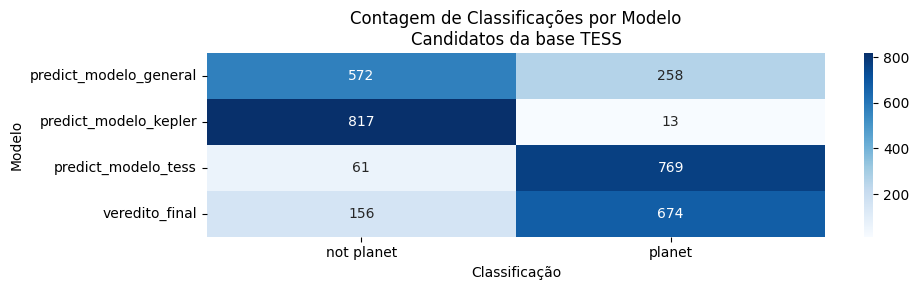

In [94]:
tess_candidates_values = tess_candidates_predict.iloc[:,-4:]
tess_candidates_values_long = tess_candidates_values.melt(var_name='Modelo', value_name='Classificacão')
tess_candidates_values_long_count = tess_candidates_values_long.groupby(['Modelo', 'Classificacão']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 3))
sns.heatmap(tess_candidates_values_long_count, annot=True, cmap='Blues', fmt='d')
plt.title('Contagem de Classificações por Modelo\nCandidatos da base TESS')
plt.ylabel('Modelo')
plt.xlabel('Classificação')
plt.tight_layout()
plt.show()

In [89]:
tess_candidates_predict['veredito_final'] = (tess_candidates_predict[[
    'predict_modelo_k2',
    'predict_modelo_kepler',
    'predict_modelo_tess',
    'predict_modelo_general',
]] == 'planet').sum(axis=1).apply(lambda x: 'planet' if x >= 2 else 'not planet')
tess_candidates_predict

,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth,predict_modelo_k2,predict_modelo_kepler,predict_modelo_tess,predict_modelo_general,veredito_final
13,0.325166,0.539076,0.129683,0.025562,0.081807,0.793758,0.019660,0.651805,0.000401,0.399326,0.003700,not planet,not planet,not planet,not planet,not planet
44,0.415741,0.171994,0.064516,0.010311,0.043717,0.184125,0.194121,0.733551,0.002339,0.000507,0.004843,not planet,not planet,planet,planet,planet
59,0.937688,0.077425,0.066753,0.014376,0.008465,0.152132,0.008373,0.723469,0.004925,0.000865,0.000662,planet,not planet,planet,not planet,planet
61,0.839324,0.196877,0.070224,0.010353,0.006345,0.127980,0.005563,0.718147,0.008415,0.000314,0.000968,planet,not planet,planet,not planet,planet
62,0.814793,0.195671,0.063052,0.008391,0.008808,0.116688,0.003446,0.750642,0.009491,0.000221,0.002169,planet,not planet,planet,not planet,planet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,0.171896,0.359897,0.062468,0.017811,0.028672,0.254391,0.015775,0.644980,0.001936,0.004488,0.004057,planet,not planet,planet,not planet,planet
6985,0.231017,0.391449,0.062237,0.012905,0.046449,0.574184,0.019739,0.689343,0.000239,0.110591,0.003284,planet,not planet,not planet,not planet,not planet
6996,0.319724,0.512830,0.030537,0.006919,0.010445,0.151349,0.004804,0.738826,0.000916,0.000597,0.003700,planet,not planet,planet,not planet,planet
7013,0.333532,0.559007,0.115835,0.015063,0.031704,0.607905,0.027239,0.694462,0.000217,0.138698,0.005389,planet,not planet,not planet,not planet,not planet


C:\Users\janna\AppData\Local\Temp\ipykernel_13996\555191544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')


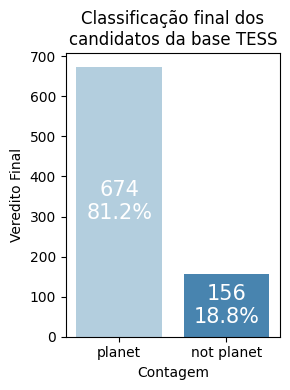

In [101]:
veredito_counts = tess_candidates_predict['veredito_final'].value_counts()
total = veredito_counts.sum()
plt.figure(figsize=(3,4))
barplot = sns.barplot(x=veredito_counts.index, y=veredito_counts, palette='Blues')
for p in barplot.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    barplot.annotate(f'{int(height)}\n{percentage}', 
                     (p.get_x() + p.get_width() / 2., height / 2), 
                     ha = 'center', va = 'center', 
                     color='white', size=15)
plt.title('Classificação final dos\ncandidatos da base TESS')
plt.xlabel('Contagem')
plt.ylabel('Veredito Final')
plt.tight_layout()
plt.show()